In [1]:
import model
import numpy as np
import tensorflow as tf
import image_preprocessing
import matplotlib.pyplot as plt

In [2]:
import os
def print_directory_contents(directory):
    try:
        # List all files and directories in the specified directory
        entries = os.listdir(directory)
        print(f"Contents of '{directory}':")
        for entry in entries:
            print(entry)
    except FileNotFoundError:
        print(f"Directory '{directory}' not found.")
    except PermissionError:
        print(f"Permission denied to access '{directory}'.")

print_directory_contents("preprocessed_dataset/train")

Contents of 'preprocessed_dataset/train':
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___healthy
Cherry_(including_sour)___Powdery_mildew
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___healthy
Corn_(maize)___Northern_Leaf_Blight
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___healthy
Strawberry___Leaf_scorch
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Toma

In [3]:
import importlib
importlib.reload(image_preprocessing)

num_samples = 3200
input_shape = (128, 128, 3)
batch_size = 32

# Create the label encoder using the training dataset
X_train, y_train, label_encoder = image_preprocessing.create_numpy_dataset(
    "preprocessed_dataset/train"
)

# Use the same label encoder for validation and test datasets
X_val, y_val, _ = image_preprocessing.create_numpy_dataset(
    "preprocessed_dataset/valid", label_encoder=label_encoder
)

# Convert the unint 8s to float for training and renormalize.
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

X_train = X_train[indices]
y_train = y_train[indices]

print(X_train.shape)
print(y_train.shape)

(70295, 128, 128, 3)
(70295,)


In [4]:
print(f"Image array shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"Labels shape: {y_train.shape}, dtype: {y_train.dtype}")

Image array shape: (70295, 128, 128, 3), dtype: float32
Labels shape: (70295,), dtype: int32


In [5]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

num_classes = 38

y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

In [6]:
# Convert one-hot encoded labels to class indices
y_train_flat = np.argmax(y_train, axis=1) if len(y_train.shape) > 1 else y_train
y_val_flat = np.argmax(y_val, axis=1) if len(y_val.shape) > 1 else y_val

# Now print the unique classes
print("Training set classes:", set(y_train_flat))
print("Validation set classes:", set(y_val_flat))
print("Encoded classes:", label_encoder.classes_)

Training set classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37}
Validation set classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37}
Encoded classes: ['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 '

Batch images shape: (128, 128, 3)
Batch labels shape: (38,)


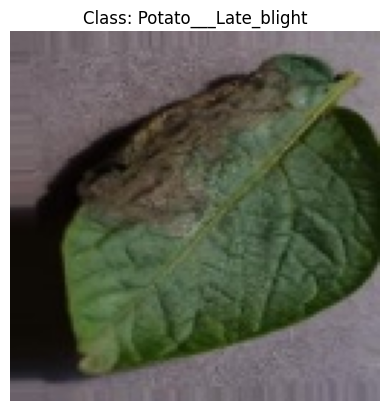

[[[0.42745098 0.38431373 0.40784314]
  [0.42745098 0.38431373 0.40784314]
  [0.42745098 0.38431373 0.40784314]
  ...
  [0.54901963 0.5254902  0.5411765 ]
  [0.52156866 0.49803922 0.5137255 ]
  [0.5372549  0.5137255  0.52156866]]

 [[0.42352942 0.38039216 0.40392157]
  [0.42745098 0.38431373 0.40784314]
  [0.42745098 0.38431373 0.40784314]
  ...
  [0.54509807 0.52156866 0.5372549 ]
  [0.52156866 0.49803922 0.5058824 ]
  [0.53333336 0.50980395 0.5176471 ]]

 [[0.42352942 0.38039216 0.40392157]
  [0.42745098 0.38431373 0.40784314]
  [0.42745098 0.38431373 0.40784314]
  ...
  [0.54509807 0.52156866 0.5372549 ]
  [0.53333336 0.50980395 0.5176471 ]
  [0.5372549  0.5137255  0.52156866]]

 ...

 [[0.41568628 0.3764706  0.4117647 ]
  [0.41568628 0.3764706  0.4117647 ]
  [0.41568628 0.3764706  0.4117647 ]
  ...
  [0.49411765 0.47058824 0.5176471 ]
  [0.4862745  0.4627451  0.50980395]
  [0.50980395 0.4862745  0.53333336]]

 [[0.41568628 0.3764706  0.4117647 ]
  [0.41568628 0.3764706  0.4117647 ]


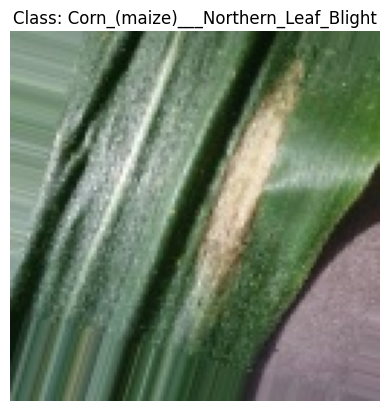

[[[0.49019608 0.5803922  0.5019608 ]
  [0.49411765 0.58431375 0.5058824 ]
  [0.49411765 0.58431375 0.5137255 ]
  ...
  [0.26666668 0.38431373 0.24313726]
  [0.28627452 0.40392157 0.2627451 ]
  [0.27450982 0.39215687 0.2509804 ]]

 [[0.47058824 0.56078434 0.48235294]
  [0.47058824 0.56078434 0.48235294]
  [0.4745098  0.5647059  0.49411765]
  ...
  [0.28235295 0.4        0.25882354]
  [0.27058825 0.3882353  0.24705882]
  [0.28235295 0.4        0.25882354]]

 [[0.4862745  0.5764706  0.5058824 ]
  [0.49019608 0.5803922  0.50980395]
  [0.49019608 0.5803922  0.50980395]
  ...
  [0.2901961  0.40784314 0.26666668]
  [0.25882354 0.38431373 0.23921569]
  [0.28627452 0.4117647  0.26666668]]

 ...

 [[0.34509805 0.42745098 0.36862746]
  [0.3529412  0.44705883 0.38431373]
  [0.21568628 0.3372549  0.26666668]
  ...
  [0.5176471  0.46666667 0.5058824 ]
  [0.5137255  0.4627451  0.5019608 ]
  [0.5137255  0.4627451  0.5019608 ]]

 [[0.38431373 0.46666667 0.4       ]
  [0.32156864 0.41960785 0.34509805]


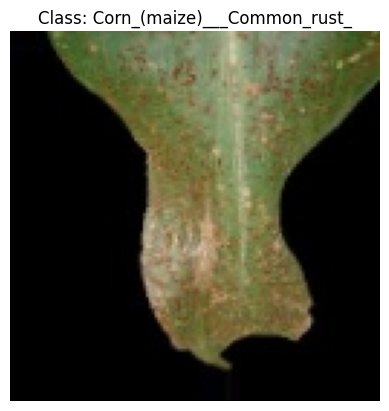

[[[0.00784314 0.01176471 0.        ]
  [0.00784314 0.01176471 0.        ]
  [0.01176471 0.00392157 0.00784314]
  ...
  [0.38039216 0.38039216 0.18431373]
  [0.45490196 0.45490196 0.25882354]
  [0.35686275 0.3647059  0.16862746]]

 [[0.00392157 0.00784314 0.        ]
  [0.00392157 0.00784314 0.        ]
  [0.00784314 0.         0.01176471]
  ...
  [0.36078432 0.36078432 0.16470589]
  [0.35686275 0.35686275 0.16078432]
  [0.28235295 0.28235295 0.07843138]]

 [[0.00784314 0.00784314 0.        ]
  [0.00784314 0.00784314 0.        ]
  [0.00784314 0.00392157 0.02352941]
  ...
  [0.2784314  0.2901961  0.08235294]
  [0.27450982 0.26666668 0.06666667]
  [0.3019608  0.2901961  0.08235294]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


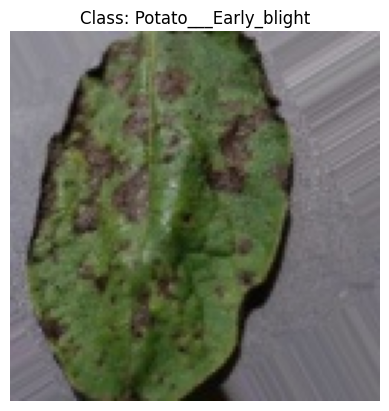

[[[0.5686275  0.5647059  0.59607846]
  [0.57254905 0.5686275  0.6       ]
  [0.5686275  0.5647059  0.59607846]
  ...
  [0.62352943 0.6039216  0.6313726 ]
  [0.6117647  0.5921569  0.61960787]
  [0.654902   0.63529414 0.6627451 ]]

 [[0.5568628  0.5529412  0.58431375]
  [0.57254905 0.5686275  0.6       ]
  [0.57254905 0.5686275  0.6       ]
  ...
  [0.64705884 0.627451   0.654902  ]
  [0.68235296 0.6627451  0.6901961 ]
  [0.5921569  0.57254905 0.6       ]]

 [[0.54901963 0.54509807 0.5764706 ]
  [0.5647059  0.56078434 0.5921569 ]
  [0.5764706  0.57254905 0.6039216 ]
  ...
  [0.62352943 0.6039216  0.627451  ]
  [0.53333336 0.5137255  0.5372549 ]
  [0.54509807 0.5254902  0.54901963]]

 ...

 [[0.44705883 0.43529412 0.47843137]
  [0.4509804  0.4392157  0.48235294]
  [0.4745098  0.4627451  0.5058824 ]
  ...
  [0.43137255 0.42352942 0.44313726]
  [0.4392157  0.43137255 0.4509804 ]
  [0.45882353 0.4509804  0.47058824]]

 [[0.4862745  0.4627451  0.50980395]
  [0.48235294 0.45882353 0.5058824 ]


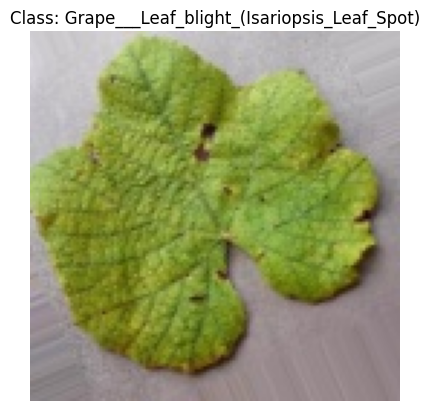

[[[0.80784315 0.8        0.81960785]
  [0.8039216  0.79607844 0.8156863 ]
  [0.8039216  0.79607844 0.80784315]
  ...
  [0.74509805 0.7372549  0.7490196 ]
  [0.7411765  0.73333335 0.74509805]
  [0.7411765  0.73333335 0.74509805]]

 [[0.8117647  0.8039216  0.8235294 ]
  [0.8039216  0.79607844 0.8156863 ]
  [0.8039216  0.79607844 0.80784315]
  ...
  [0.7411765  0.73333335 0.74509805]
  [0.74509805 0.7372549  0.7490196 ]
  [0.7490196  0.7411765  0.7529412 ]]

 [[0.81960785 0.8117647  0.83137256]
  [0.80784315 0.8        0.81960785]
  [0.8039216  0.79607844 0.8156863 ]
  ...
  [0.7529412  0.74509805 0.75686276]
  [0.75686276 0.7490196  0.7607843 ]
  [0.7607843  0.7529412  0.7647059 ]]

 ...

 [[0.5176471  0.49411765 0.5019608 ]
  [0.5372549  0.5137255  0.52156866]
  [0.54509807 0.52156866 0.5294118 ]
  ...
  [0.5764706  0.5176471  0.5294118 ]
  [0.5764706  0.5176471  0.5372549 ]
  [0.58431375 0.5254902  0.54509807]]

 [[0.5372549  0.5137255  0.5294118 ]
  [0.5294118  0.5058824  0.52156866]


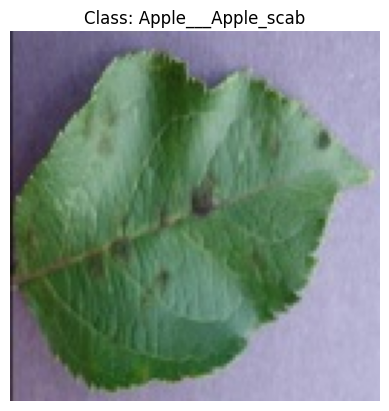

[[[0.20784314 0.1882353  0.2784314 ]
  [0.39607844 0.37254903 0.4745098 ]
  [0.40392157 0.36862746 0.49019608]
  ...
  [0.6745098  0.65882355 0.7882353 ]
  [0.6627451  0.64705884 0.7764706 ]
  [0.6666667  0.6509804  0.78039217]]

 [[0.20392157 0.18431373 0.27450982]
  [0.39607844 0.37254903 0.4745098 ]
  [0.39607844 0.36078432 0.48235294]
  ...
  [0.6745098  0.65882355 0.7882353 ]
  [0.6509804  0.63529414 0.7647059 ]
  [0.6666667  0.6509804  0.78039217]]

 [[0.20392157 0.18431373 0.27450982]
  [0.39607844 0.37254903 0.4745098 ]
  [0.39607844 0.36078432 0.48235294]
  ...
  [0.6784314  0.6627451  0.7921569 ]
  [0.6431373  0.627451   0.75686276]
  [0.65882355 0.6431373  0.77254903]]

 ...

 [[0.2509804  0.19215687 0.26666668]
  [0.48235294 0.42352942 0.5058824 ]
  [0.5019608  0.4392157  0.54509807]
  ...
  [0.7254902  0.7137255  0.8352941 ]
  [0.7411765  0.7294118  0.8509804 ]
  [0.7372549  0.7254902  0.84705883]]

 [[0.25882354 0.20392157 0.27058825]
  [0.48235294 0.42352942 0.5058824 ]


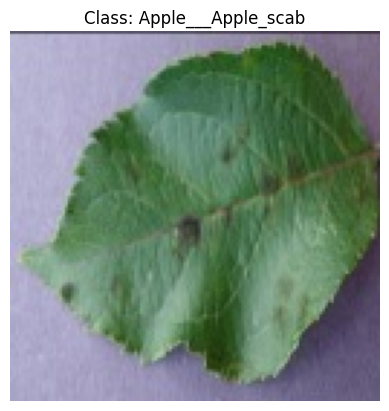

[[[0.36078432 0.3529412  0.43529412]
  [0.36078432 0.3529412  0.43529412]
  [0.36862746 0.36078432 0.44313726]
  ...
  [0.2784314  0.21960784 0.29411766]
  [0.27058825 0.21176471 0.28627452]
  [0.27450982 0.21568628 0.2901961 ]]

 [[0.7294118  0.72156864 0.80784315]
  [0.73333335 0.7254902  0.8117647 ]
  [0.7411765  0.73333335 0.81960785]
  ...
  [0.49019608 0.43137255 0.5137255 ]
  [0.49803922 0.4392157  0.52156866]
  [0.4745098  0.41568628 0.49803922]]

 [[0.7411765  0.7294118  0.8352941 ]
  [0.7372549  0.7254902  0.83137256]
  [0.7372549  0.7254902  0.83137256]
  ...
  [0.48235294 0.41960785 0.52156866]
  [0.5019608  0.4392157  0.5411765 ]
  [0.4627451  0.4        0.5019608 ]]

 ...

 [[0.65882355 0.6431373  0.77254903]
  [0.6509804  0.63529414 0.7647059 ]
  [0.6627451  0.64705884 0.7764706 ]
  ...
  [0.40392157 0.3647059  0.49803922]
  [0.39215687 0.3529412  0.4862745 ]
  [0.39607844 0.35686275 0.49019608]]

 [[0.654902   0.6392157  0.76862746]
  [0.654902   0.6392157  0.76862746]


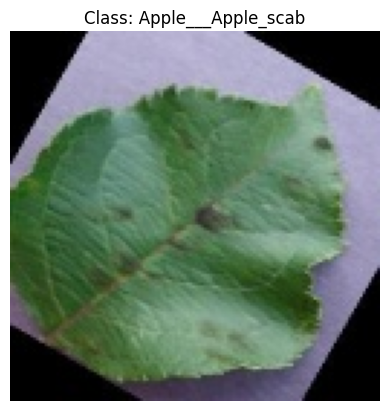

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
Batch images shape: (128, 128, 3)
Batch labels shape: (38,)


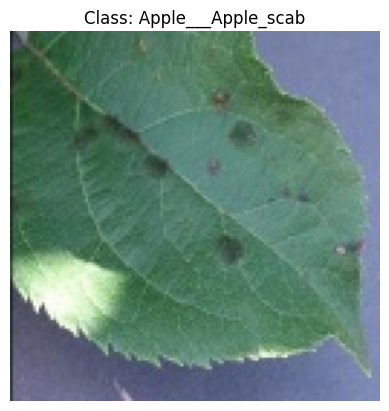

[[[0.09019608 0.12941177 0.1254902 ]
  [0.25490198 0.29411766 0.29803923]
  [0.3764706  0.41960785 0.44313726]
  ...
  [0.47843137 0.5254902  0.6901961 ]
  [0.4745098  0.52156866 0.6862745 ]
  [0.4862745  0.53333336 0.69803923]]

 [[0.12941177 0.16862746 0.1764706 ]
  [0.24705882 0.28235295 0.3019608 ]
  [0.23529412 0.27058825 0.30588236]
  ...
  [0.48235294 0.5294118  0.69411767]
  [0.48235294 0.5294118  0.69411767]
  [0.49019608 0.5372549  0.7019608 ]]

 [[0.13333334 0.16078432 0.2       ]
  [0.27450982 0.29803923 0.34509805]
  [0.25882354 0.27058825 0.32941177]
  ...
  [0.47843137 0.5254902  0.6901961 ]
  [0.47843137 0.5254902  0.6901961 ]
  [0.4862745  0.53333336 0.69803923]]

 ...

 [[0.21960784 0.22352941 0.30588236]
  [0.41960785 0.41960785 0.5137255 ]
  [0.44705883 0.44705883 0.5568628 ]
  ...
  [0.49803922 0.54901963 0.72156864]
  [0.49803922 0.54901963 0.7254902 ]
  [0.49411765 0.54509807 0.72156864]]

 [[0.22352941 0.22745098 0.30980393]
  [0.4392157  0.4392157  0.53333336]


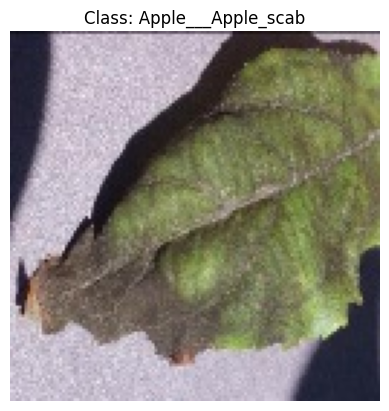

[[[0.06666667 0.06666667 0.11372549]
  [0.07450981 0.07450981 0.12156863]
  [0.04705882 0.04705882 0.09411765]
  ...
  [0.36862746 0.32941177 0.37254903]
  [0.39215687 0.34901962 0.40392157]
  [0.3647059  0.32156864 0.3764706 ]]

 [[0.13333334 0.12941177 0.18431373]
  [0.14117648 0.13725491 0.19215687]
  [0.10980392 0.10588235 0.16078432]
  ...
  [0.6901961  0.6431373  0.6901961 ]
  [0.74509805 0.69803923 0.74509805]
  [0.7254902  0.6784314  0.7254902 ]]

 [[0.13725491 0.13333334 0.20392157]
  [0.14509805 0.14117648 0.21176471]
  [0.12156863 0.11764706 0.1882353 ]
  ...
  [0.7254902  0.6627451  0.7019608 ]
  [0.7607843  0.69803923 0.7411765 ]
  [0.7372549  0.6745098  0.7176471 ]]

 ...

 [[0.7921569  0.75686276 0.8235294 ]
  [0.80784315 0.77254903 0.8392157 ]
  [0.69803923 0.6627451  0.7294118 ]
  ...
  [0.12156863 0.13333334 0.20784314]
  [0.12941177 0.14117648 0.21568628]
  [0.1254902  0.13725491 0.21176471]]

 [[0.80784315 0.77254903 0.8392157 ]
  [0.7764706  0.7411765  0.80784315]


In [7]:
example_images = X_train[:5]
examples_labels = y_train[:5]

for image, label in zip(example_images, examples_labels):  # Take one batch
    print("Batch images shape:", image.shape)
    print("Batch labels shape:", label.shape)

    img = image
    img = (img * 255).astype("uint8")
    plt.imshow(img)
    # Flatten the label array before using inverse_transform
    class_label = label_encoder.inverse_transform(label.argmax(axis=0).reshape(-1))[0]
    plt.title(f"Class: {class_label}")
    plt.axis('off')
    plt.show()

    print(image)

for image, label in zip(X_val[:5], y_val[:5]):  # Take one batch
    print("Batch images shape:", image.shape)
    print("Batch labels shape:", label.shape)

    img = image
    img = (img * 255).astype("uint8")
    plt.imshow(img)
    # Flatten the label array before using inverse_transform
    class_label = label_encoder.inverse_transform(label.argmax(axis=0).reshape(-1))[0]
    plt.title(f"Class: {class_label}")
    plt.axis('off')
    plt.show()

    print(image)


In [8]:
importlib.reload(model)
importlib.reload(image_preprocessing)

plant_model = model.plant_resnet(input_shape, 
                            num_classes, 
                            20,
                            dropout_rate=0.3)
plant_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 128)  18944       ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 128)  512        ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [9]:
from tensorflow.keras.callbacks import EarlyStopping


# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Metric to monitor (e.g., 'val_loss' or 'val_accuracy')
    patience=5,            # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore the weights of the best epoch
)

# Train the model
history_resnet = plant_model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Save the trained model
plant_model.save("plant_resnet20_model.h5")

Epoch 1/50
1978/1978 [==============================] - 219s 106ms/step - loss: 1.8534 - accuracy: 0.4846 - val_loss: 8.7957 - val_accuracy: 0.1492
Epoch 2/50
1978/1978 [==============================] - 214s 108ms/step - loss: 0.7972 - accuracy: 0.7492 - val_loss: 19.9418 - val_accuracy: 0.0401
Epoch 3/50
1978/1978 [==============================] - 217s 110ms/step - loss: 0.5539 - accuracy: 0.8213 - val_loss: 5.9291 - val_accuracy: 0.2900
Epoch 4/50
1978/1978 [==============================] - 218s 110ms/step - loss: 0.4242 - accuracy: 0.8634 - val_loss: 2.9432 - val_accuracy: 0.3782
Epoch 5/50
1978/1978 [==============================] - 217s 110ms/step - loss: 0.3582 - accuracy: 0.8841 - val_loss: 1.7818 - val_accuracy: 0.5595
Epoch 6/50
1978/1978 [==============================] - 218s 110ms/step - loss: 0.3014 - accuracy: 0.9034 - val_loss: 6.5269 - val_accuracy: 0.2435
Epoch 7/50
1978/1978 [==============================] - 218s 110ms/step - loss: 0.2714 - accuracy: 0.9123 - val

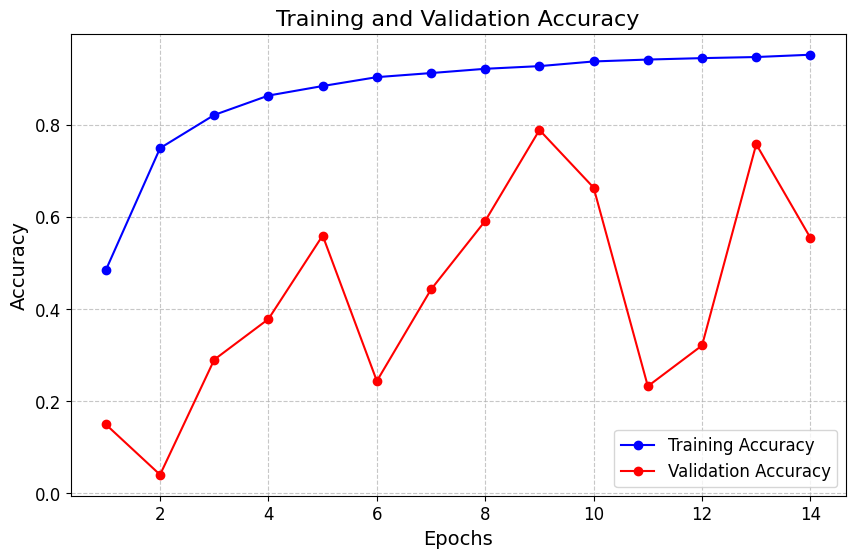

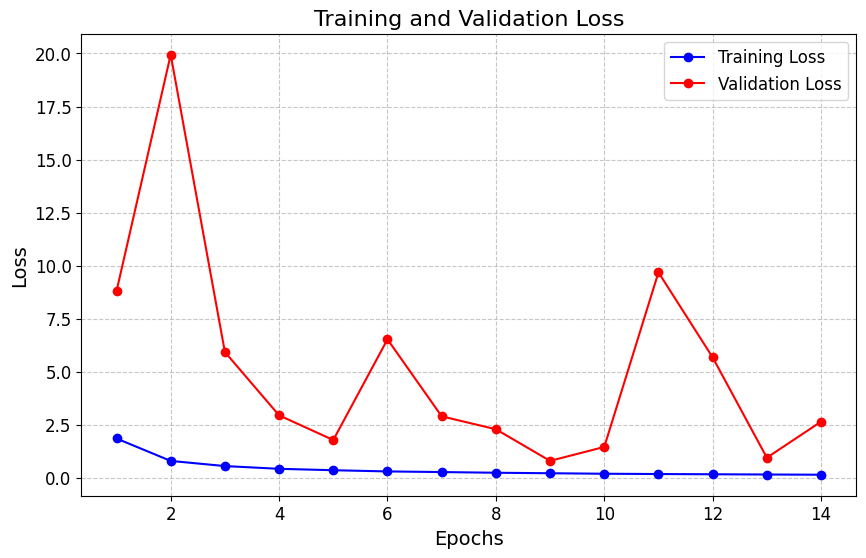

In [10]:
import matplotlib.pyplot as plt

# Extract metrics from the history object
acc = history_resnet.history['accuracy']
val_acc = history_resnet.history['val_accuracy']
loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']

# Define the number of epochs
epochs = range(1, len(acc) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Accuracy_Results.png")
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Loss_Results.png")
plt.show()

### GAP Segmentation Extraction

In [11]:
from tensorflow.keras import layers, Model

def generate_heatmap(model, img, class_idx):
    # Get weights from the dense prediction layer (last layer, excluding biases)
    last_layer_weights = model.layers[-1].get_weights()[0]  # Dense prediction layer
    last_layer_weights_for_class = last_layer_weights[:, class_idx]  # Shape: (128,)

    # Extract the output of the last conv layer (dropout_10 in this case)
    last_conv_model = Model(model.input, model.layers[-3].output)
    last_conv_output = last_conv_model.predict(img[np.newaxis, :, :, :])  # Add batch dimension
    print(f"Shape of last_conv_output: {last_conv_output.shape}")

    # Squeeze to remove the batch dimension
    last_conv_output = np.squeeze(last_conv_output)  # Shape should now be (32, 32, 128)

    # Ensure the feature maps are 3D
    if len(last_conv_output.shape) != 3:
        raise ValueError(f"Expected 3D feature map, got shape: {last_conv_output.shape}")

    # Upsample the feature maps to match the input image dimensions
    h = img.shape[0] / last_conv_output.shape[0]
    w = img.shape[1] / last_conv_output.shape[1]
    upsampled_last_conv_output = scipy.ndimage.zoom(last_conv_output, (h, w, 1), order=1)

    # Multiply each feature map by the corresponding weight and sum along the depth axis
    # Reshape last_layer_weights_for_class to match the depth axis
    heat_map = np.dot(upsampled_last_conv_output, last_layer_weights_for_class[:last_conv_output.shape[-1]])

    # Normalize the heatmap for visualization
    heat_map = np.maximum(heat_map, 0)  # ReLU to remove negative values
    heat_map /= np.max(heat_map)  # Normalize to [0, 1]

    return heat_map

In [12]:
test_loss, test_accuracy = plant_model.evaluate(X_val, y_val, verbose=1)

# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

550/550 [==============================] - 16s 29ms/step - loss: 0.6243 - accuracy: 0.8289
Test Loss: 0.6243
Test Accuracy: 82.89%


1/1 [==============================] - 1s 806ms/step
Predicted Class Probabilities: [[2.8653043e-12 1.1314135e-12 1.5868802e-07 4.8734701e-12 2.1664278e-13
  3.5599694e-08 2.7338920e-10 2.1186905e-07 3.1124886e-13 1.6677913e-09
  2.4428543e-19 1.6876345e-05 5.0021561e-07 5.8771889e-06 5.5364718e-10
  5.5353848e-06 4.8874411e-09 9.2448127e-17 1.9056879e-05 1.3338233e-11
  1.5818862e-11 3.8323517e-08 5.1130458e-12 1.0233667e-11 1.2485554e-10
  9.2140660e-08 6.4024688e-11 7.5097111e-15 9.5662278e-01 3.1968050e-06
  1.1297748e-08 3.8405515e-02 3.3205443e-03 2.2758547e-06 6.3139923e-06
  1.5910098e-03 9.3723250e-13 2.9018952e-16]]
Predicted Class: 28
True Class: Tomato___Bacterial_spot
Predicted Class: Tomato___Bacterial_spot
1/1 [==============================] - 1s 753ms/step
Shape of last_conv_output: (1, 32, 32, 128)


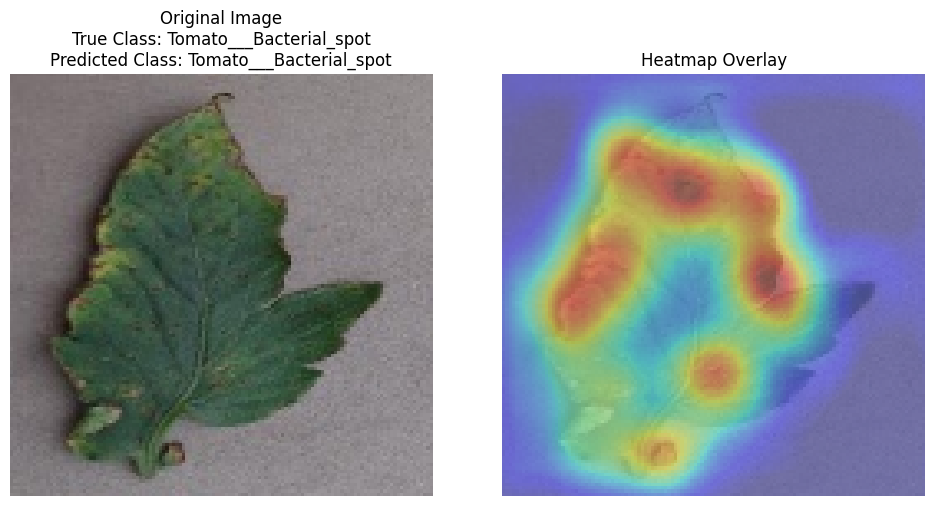

In [13]:
import random
import scipy

# Example: Generate a heatmap for an image
random_img_idx = random.randint(0, len(X_val) - 1)
img = X_val[random_img_idx]

# Get the true class
true_class_idx = np.argmax(y_val[random_img_idx])  # Get the true class index
true_class_label = label_encoder.inverse_transform([true_class_idx])[0]  # Decode the true class

# Predict the class for the image
prediction = plant_model.predict(img[np.newaxis, :, :, :])
print("Predicted Class Probabilities:", prediction)
print("Predicted Class:", np.argmax(prediction))

predicted_class_idx = np.argmax(prediction)

predicted_class_label = label_encoder.inverse_transform([predicted_class_idx])[0]  # Decode predicted class

# Print real and predicted class
print(f"True Class: {true_class_label}")
print(f"Predicted Class: {predicted_class_label}")

# Generate the heatmap
heatmap = generate_heatmap(plant_model, img, predicted_class_idx)

# Plot the image and heatmap
plt.figure(figsize=(10, 5))

# Original image with true and predicted class
plt.subplot(1, 2, 1)
plt.title(f"Original Image\nTrue Class: {true_class_label}\nPredicted Class: {predicted_class_label}")
plt.imshow(img)
plt.axis('off')

# Heatmap overlay
plt.subplot(1, 2, 2)
plt.title("Heatmap Overlay")
plt.imshow(img, alpha=0.6)
plt.imshow(heatmap, cmap='jet', alpha=0.4)  # Heatmap overlay
plt.axis('off')
plt.tight_layout()
plt.show()